In [1]:
from molmap.model import RegressionEstimator, MultiClassEstimator, MultiLabelEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from molmap import dataset
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from molmap import MolMap
from molmap import feature
# 打开molmap的环境，molmap.model;molmap等宏包会自动导入到这个环境中。
# from tensorflow.keras.datasets import mnist
import tensorflow as tf
import os
from tensorflow.keras.layers import Input,Dense, Conv2D, Conv2DTranspose, MaxPooling2D, Flatten, UpSampling2D, Reshape
from tensorflow.keras.models import Model,Sequential
from joblib import load,dump #导入模型 
import matplotlib.pyplot as plt
import umap
%matplotlib inline

In [2]:
gpuid = "2"
os.environ["CUDA_VISIBLE_DEVICES"] = gpuid
physical_gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_gpus[0], True)

In [3]:
X1 = load('../dataset/pubchem_molecule3.data2')

In [4]:
X2 = X1[:10]

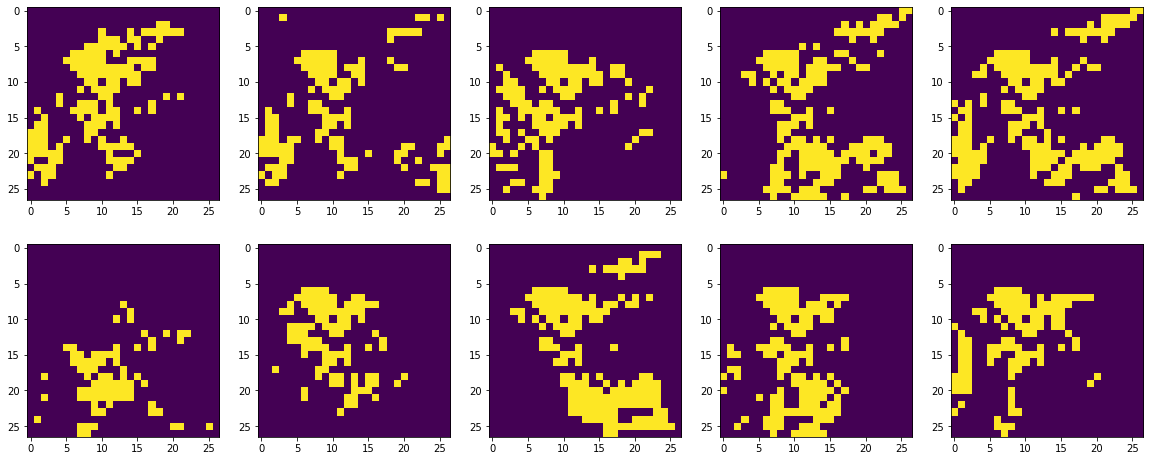

In [5]:
fig = plt.figure(figsize = (20,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(X2[i])

In [6]:
from tensorflow.keras import layers, models, Input
class Encoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = layers.Flatten()
        self.d1 = layers.Dense(1024, activation='relu')
        self.d2 = layers.Dense(512, activation='relu')
        self.d3 = layers.Dense(128, activation='relu')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        return x

class Decoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.d9 = layers.Dense(128, activation='relu')
        self.d10 = layers.Dense(512, activation='relu')
        self.d11 = layers.Dense(1024, activation='relu')
        self.d12 = layers.Dense(729, activation='sigmoid')
        self.re = layers.Reshape((27, 27, 1))  # Reshape to match input dimensions

    def call(self, x):
        x = self.d9(x)
        x = self.d10(x)
        x = self.d11(x)
        x = self.d12(x)
        return self.re(x)

class Autoencoder(tf.keras.Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def call(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [21]:
# 
# model = autoencoder()

In [7]:
input_shape = (27, 27, 1)
inputs = Input(shape=input_shape)
autoencoder = Autoencoder()
outputs = autoencoder(inputs)
model = models.Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy')


In [8]:
print(type(X1))
print(X1.shape)


<class 'numpy.ndarray'>
(1937109, 27, 27, 1)


In [10]:
# model.compile(optimizer='Adam',loss='binary_crossentropy')
history1 = model.fit(X1, X1, batch_size=768, epochs=100)

Epoch 1/100
2523/2523 [==============================] - 17s 6ms/step - loss: 0.0500
Epoch 2/100
2523/2523 [==============================] - 16s 6ms/step - loss: 0.0219
Epoch 3/100
2523/2523 [==============================] - 16s 7ms/step - loss: 0.0125
Epoch 4/100
2523/2523 [==============================] - 16s 6ms/step - loss: 0.0187
Epoch 5/100
2523/2523 [==============================] - 16s 7ms/step - loss: 0.0093
Epoch 6/100
2523/2523 [==============================] - 16s 6ms/step - loss: 0.0144
Epoch 7/100
2523/2523 [==============================] - 16s 6ms/step - loss: 0.0113
Epoch 8/100
2523/2523 [==============================] - 16s 7ms/step - loss: 0.0138
Epoch 9/100
2523/2523 [==============================] - 16s 6ms/step - loss: 0.0104
Epoch 10/100
2523/2523 [==============================] - 16s 6ms/step - loss: 0.0100
Epoch 11/100
2523/2523 [==============================] - 16s 6ms/step - loss: 0.0144
Epoch 12/100
2523/2523 [==============================] - 16s 6

<AxesSubplot:>

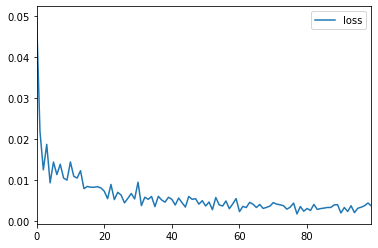

In [11]:
pd.DataFrame(history1.history).plot()

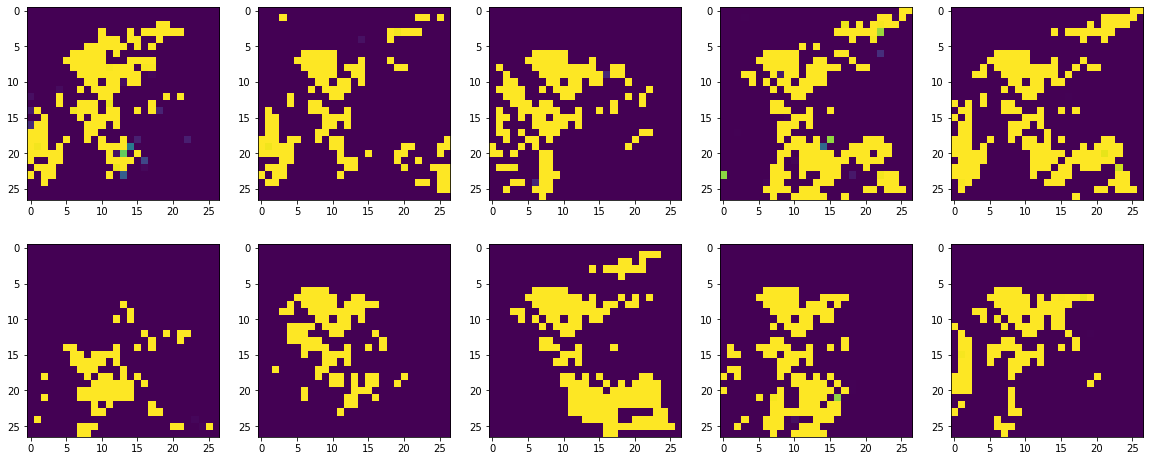

In [12]:
y_pre = model.predict(X1[:10])
fig = plt.figure(figsize = (20,8))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(y_pre[i])

In [13]:
print(y_pre)

[[[[9.30597505e-28]
   [3.45143600e-34]
   [0.00000000e+00]
   ...
   [2.22635899e-26]
   [3.74885019e-07]
   [6.78562414e-15]]

  [[4.10557520e-30]
   [4.54610166e-24]
   [1.77393361e-24]
   ...
   [1.45193073e-15]
   [4.43005327e-10]
   [8.15165125e-23]]

  [[7.40077560e-34]
   [0.00000000e+00]
   [2.80729466e-18]
   ...
   [7.10012980e-16]
   [5.38268345e-12]
   [3.52676158e-22]]

  ...

  [[2.15658929e-15]
   [2.60485540e-04]
   [9.99999642e-01]
   ...
   [3.85695097e-14]
   [0.00000000e+00]
   [5.32755950e-23]]

  [[4.75662945e-16]
   [1.46165136e-10]
   [4.81564584e-20]
   ...
   [4.58921541e-21]
   [1.86836508e-06]
   [0.00000000e+00]]

  [[5.07243025e-10]
   [4.81350909e-15]
   [0.00000000e+00]
   ...
   [1.16356219e-36]
   [1.10620820e-35]
   [1.17957045e-36]]]


 [[[7.66973898e-12]
   [3.96974641e-11]
   [1.27509848e-29]
   ...
   [2.48704343e-30]
   [6.78053569e-09]
   [1.60750020e-18]]

  [[7.36263051e-09]
   [8.69673666e-09]
   [2.07276081e-08]
   ...
   [2.84784132e-13]
 

In [14]:
model.save('../model/Comparison/pubchem_test1_model_2') 

In [11]:
from tensorflow.keras.models import load_model

model = load_model('../model/Comparison/pubchem_test1_model_2')

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 27, 27, 1)]       0         
_________________________________________________________________
autoencoder (Autoencoder)    (None, 27, 27, 1)         2693081   
Total params: 2,693,081
Trainable params: 2,693,081
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.backend import set_session
from keras.backend import clear_session
from keras.backend import get_session
import tensorflow as tf
import gc
 
# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()
 
    try:
        del classifier # this is from global space - change this as you need
    except:
        pass
 
    print(gc.collect()) # if it does something you should see a number as output
 
    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tf.compat.v1.Session(config=config))

In [14]:
reset_keras()
X2 = autoencoder.encoder(X1[:200000])

15292


In [15]:
X2

<tf.Tensor: shape=(200000, 128), dtype=float32, numpy=
array([[0.19343714, 0.        , 0.        , ..., 0.3316153 , 0.28914046,
        0.        ],
       [0.19483575, 0.        , 0.        , ..., 0.3022075 , 0.14199077,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.26730025, 0.31654125,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.02965024,
        0.        ],
       [0.08723743, 0.        , 0.        , ..., 0.35013613, 0.15836996,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.4108558 , 0.18222268,
        0.09638931]], dtype=float32)>

In [16]:
X6 = autoencoder.encoder(X1[200000:400000])
reset_keras()
X7 = autoencoder.encoder(X1[400000:600000])
reset_keras()
X8 = autoencoder.encoder(X1[600000:800000])
reset_keras()
X9 = autoencoder.encoder(X1[800000:1000000])
reset_keras()
X10 = autoencoder.encoder(X1[1000000:1200000])
reset_keras()
X11 = autoencoder.encoder(X1[1200000:1400000])
reset_keras()
X12 = autoencoder.encoder(X1[1400000:1600000])
reset_keras()
X13 = autoencoder.encoder(X1[1600000:1800000])
reset_keras()
X14 = autoencoder.encoder(X1[1800000:2000000])

100
100
100
100
100
100
100
100


In [17]:
dump(X2, '../result/Comparison/PCA/1-dae/1-200000')
dump(X6, '../result/Comparison/PCA/1-dae/200000-400000')
dump(X7, '../result/Comparison/PCA/1-dae/400000-600000')
dump(X8, '../result/Comparison/PCA/1-dae/600000-800000')
dump(X9, '../result/Comparison/PCA/1-dae/800000-1000000')
dump(X10, '../result/Comparison/PCA/1-dae/1000000-1200000')
dump(X11, '../result/Comparison/PCA/1-dae/1200000-1400000')
dump(X12, '../result/Comparison/PCA/1-dae/1400000-1600000')
dump(X13, '../result/Comparison/PCA/1-dae/1600000-1800000')
dump(X14, '../result/Comparison/PCA/1-dae/1800000-2000000')

['/raid/wx_home/learning/2_190w_model_new/pubchem_experiment_compari/PCA_2/1-dae/1800000-2000000']

In [18]:
combined_data = np.vstack([X2, X6, X7, X8, X9, X10, X11, X12, X13, X14])
print(np.shape(combined_data))

(1937109, 128)


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [13]:
# X5_1 = X5[:10000]


In [14]:
# X5_1.shape

In [22]:
X6 = pca.fit_transform(combined_data)

In [23]:
X6

array([[-0.23191531,  0.4383939 ,  0.57137483],
       [-0.49840993,  0.23414817,  0.22023205],
       [-0.53941447,  0.63609177,  0.314354  ],
       ...,
       [ 0.30010265, -0.6586092 ,  0.30002642],
       [-0.3000678 ,  0.48767442, -0.32862437],
       [-0.54290605, -0.37394184, -0.07125501]], dtype=float32)

In [24]:
X7 = X6[:200000]

In [27]:
from keras.backend import set_session
from keras.backend import clear_session
from keras.backend import get_session
import tensorflow as tf
import gc

def reset_keras():
    # Get the current session
    sess = get_session()
    
    # Clear the current session
    clear_session()
    
    # Close the session
    sess.close()
    
    # Reset the session using the default graph
    sess = tf.compat.v1.Session()
    
    # Optional: Reset the default graph if needed
    tf.compat.v1.reset_default_graph()
    
    # Garbage collection to clean up any lingering objects
    gc.collect()

    # Configure a new session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tf.compat.v1.Session(config=config))



In [25]:
reset_keras()
X8 = X6[200000:400000]
reset_keras()
X9 = X6[400000:600000]
reset_keras()
X10 = X6[600000:800000]
reset_keras()
X11 = X6[800000:1000000]
reset_keras()
X12 = X6[1000000:1200000]
reset_keras()
X13 = X6[1200000:1400000]
reset_keras()
X14 = X6[1400000:1600000]
reset_keras()
X15 = X6[1600000:1800000]
reset_keras()
X16 = X6[1800000:2000000]


108
100
100
100
100
100
100
100
100


In [ ]:
print(np.shape(X7))

In [26]:

dump(X7, '../result/Comparison/PCA/2-pca/1-200000')
dump(X8, '../result/Comparison/PCA/2-pca/200000-400000')
dump(X9, '../result/Comparison/PCA/2-pca/400000-600000')
dump(X10, '../result/Comparison/PCA/2-pca/600000-800000')
dump(X11, '../result/Comparison/PCA/2-pca/800000-1000000')
dump(X12, '../result/Comparison/PCA/2-pca/1000000-1200000')
dump(X13, '../result/Comparison/PCA/2-pca/1200000-1400000')
dump(X14, '../result/Comparison/PCA/2-pca/1400000-1600000')
dump(X15, '../result/Comparison/PCA/2-pca/1600000-1800000')
dump(X16, '../result/Comparison/PCA/2-pca/1800000-2000000')

['/raid/wx_home/learning/2_190w_model_new/pubchem_experiment_compari/PCA_2/2-pca/1800000-2000000']

In [27]:
df1 = pd.DataFrame(X7, columns=list('XYZ'))

In [28]:
df1

,X,Y,Z
0,-0.231915,0.438394,0.571375
1,-0.498410,0.234148,0.220232
2,-0.539414,0.636092,0.314354
3,0.416968,-0.463692,0.163808
4,0.742088,0.323566,0.196706
...,...,...,...
199995,-0.971195,-0.166907,-0.495578
199996,-0.407372,0.118502,0.316753
199997,-1.067160,-0.104300,-0.071781
199998,-0.663898,0.223191,0.441335


In [29]:
df2 = pd.DataFrame(X8, columns=list('XYZ'))
df3 = pd.DataFrame(X9, columns=list('XYZ'))
df4 = pd.DataFrame(X10, columns=list('XYZ'))
df5 = pd.DataFrame(X11, columns=list('XYZ'))
df6 = pd.DataFrame(X12, columns=list('XYZ'))
df7 = pd.DataFrame(X13, columns=list('XYZ'))
df8 = pd.DataFrame(X14, columns=list('XYZ'))
df9 = pd.DataFrame(X15, columns=list('XYZ'))
df10 = pd.DataFrame(X16, columns=list('XYZ'))

In [30]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], axis=0, join='outer') 
df

,X,Y,Z
0,-0.231915,0.438394,0.571375
1,-0.498410,0.234148,0.220232
2,-0.539414,0.636092,0.314354
3,0.416968,-0.463692,0.163808
4,0.742088,0.323566,0.196706
...,...,...,...
137104,0.473749,-0.067046,0.223390
137105,0.278725,-0.047717,-0.112220
137106,0.300103,-0.658609,0.300026
137107,-0.300068,0.487674,-0.328624


In [31]:
df.to_csv('../result/Comparison/PCA/PCA_2_ME.csv')

In [32]:
import os
data = pd.read_csv('../result/Comparison/PCA/PCA_2_ME.csv', encoding='utf-8')
with open('../result/Comparison/PCA/PCA_2_190w_3d_data3.txt','a+', encoding='utf-8') as f:
    for line in data.values:
        f.write((str(line[1])+'\t'+str(line[2])+'\t'+str(line[3])+'\n')) 